<a href="https://colab.research.google.com/github/Growth-Hackers-SNU/sandbox-youtube-anlaysis/blob/main/code/deeplevel/DunDunDance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab을 가정하고 쓰여진 코드

## 기본 패키지 불러오기

In [ ]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import pickle 

In [ ]:
! pip install kiwipiepy

     |████████████████████████████████| 3.7MB 8.3MB/s 
     |████████████████████████████████| 57.3MB 49kB/s 
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.9.0-cp37-none-any.whl size=57496291 sha256=28ce97a7260b6f637bb6d32b49d990672cc6ecf07f39f655fb146c8d2d7512ed
  Stored in directory: /root/.cache/pip/wheels/61/19/a2/f85a7031e0ff829231b4562e6460a84fef599080bbb2573ef7
Successfully built kiwipiepy-model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 사용할 데이터 셋 commentA, commentB, commentC Test Set은 사용하지 않습니다. Validation Set만 하기에도 부족한 걸 
Youtube_comment_label = pd.read_csv("/content/drive/Shareddrives/[GH x Sandbox]/최종분류/sample_final.csv", index_col = 1)
Youtube_comment_label = Youtube_comment_label[['comment', 'class']]
Youtube_comment_label.head()

,comment,class
index,,
1,흠.. 일단 전 안맞을래요,7
2,자식새끼 키워봤자 아무소용업다..,7
3,방테나ㅋㅋㅋ,2
4,하람님 저고민있어욧!!\n노래잘부르고싶은데..어떻게하면 잘 부를수있을까요?오늘도 영...,1
5,희재도 준비하고있고 발표예정이예요\n다시 확인해주세요 모두 준비하고있어요 계약때문에...,7


## 데이터 전처리 및 준비

In [ ]:
# 7번 클래스 -> 0으로 처리 : 나중에 편합니다.
Youtube_comment_label.loc[Youtube_comment_label['class'] ==  7, 'class'] = 0
Youtube_comment_label.head()

,comment,class
index,,
1,흠.. 일단 전 안맞을래요,0
2,자식새끼 키워봤자 아무소용업다..,0
3,방테나ㅋㅋㅋ,2
4,하람님 저고민있어욧!!\n노래잘부르고싶은데..어떻게하면 잘 부를수있을까요?오늘도 영...,1
5,희재도 준비하고있고 발표예정이예요\n다시 확인해주세요 모두 준비하고있어요 계약때문에...,0


In [ ]:
# 각 라벨 갯수가 균형된 데이터 셋, 그냥 raw한 데이터 셋 두 개씩 클래스 3개, 7개 총 4가지 데이터 셋을 만들 겁니다.
Youtube_comment_label3 = Youtube_comment_label.copy()
Youtube_comment_label7 = Youtube_comment_label.copy()
Youtube_comment_label3_balance = Youtube_comment_label.copy()
Youtube_comment_label7_balacne = Youtube_comment_label.copy()

# Youtube_comment_label3
Youtube_comment_label3.loc[Youtube_comment_label3['class'] ==  1, 'class'] = 1
Youtube_comment_label3.loc[Youtube_comment_label3['class'] ==  2, 'class'] = 1
Youtube_comment_label3.loc[Youtube_comment_label3['class'] ==  3, 'class'] = 1
Youtube_comment_label3.loc[Youtube_comment_label3['class'] ==  4, 'class'] = 2
Youtube_comment_label3.loc[Youtube_comment_label3['class'] ==  5, 'class'] = 2
Youtube_comment_label3.loc[Youtube_comment_label3['class'] ==  6, 'class'] = 2
Youtube_comment_label3 = Youtube_comment_label3.sort_values(by = 'class', ascending = True).reset_index(drop = True)
print(Youtube_comment_label3.head())
print(f"총 데이터 갯수 : {len(Youtube_comment_label3_balance['comment'])}")
print("-------------------------------------------------------------------------------------------")

# Youtube_comment_label7
Youtube_comment_label7 # 더 건드릴 것이 없다
Youtube_comment_label7 = Youtube_comment_label7_balacne.sort_values(by = 'class', ascending = True).reset_index(drop = True)
print(Youtube_comment_label7.head())
print(f"총 데이터 갯수 : {len(Youtube_comment_label7['comment'])}")
print("-------------------------------------------------------------------------------------------")


# Youtube_comment_label3_balance
Youtube_comment_label3_balance = Youtube_comment_label3.copy()
min_class_num = Youtube_comment_label3_balance.groupby(['class'])['comment'].count().min()
Youtube_comment_label3_balance_df = pd.DataFrame(columns = ['comment', 'class'])
for i in range(3):
  Youtube_comment_label3_balance_df = Youtube_comment_label3_balance_df.append(Youtube_comment_label3_balance.loc[Youtube_comment_label3_balance['class'] == i,
                                                                                                                  ['comment', 'class']].sample(min_class_num))
Youtube_comment_label3_balance = Youtube_comment_label3_balance_df.reset_index(drop = True)
print(Youtube_comment_label3_balance.head())
print(f"각 class 별로 맞춰진 균형 갯수는 : {min_class_num}")
print(f"총 데이터 갯수 : {len(Youtube_comment_label3_balance['comment'])} = 3(class 갯수) * {min_class_num}")
print("-------------------------------------------------------------------------------------------")

# Youtube_comment_label7_balance
Youtube_comment_label7_balance = Youtube_comment_label7.copy()
min_class_num = Youtube_comment_label7_balance.groupby(['class'])['comment'].count().min()
Youtube_comment_label7_balance_df = pd.DataFrame(columns = ['comment', 'class'])
for i in range(7):
  Youtube_comment_label7_balance_df = Youtube_comment_label7_balance_df.append(Youtube_comment_label7_balance.loc[Youtube_comment_label7_balance['class'] == i,
                                                                                                                  ['comment', 'class']].sample(min_class_num))
Youtube_comment_label7_balance = Youtube_comment_label7_balance_df.reset_index(drop = True)
print(Youtube_comment_label7_balance.head())
print(f"각 class 별로 맞춰진 균형 갯수는 : {min_class_num}")
print(f"총 데이터 갯수 : {len(Youtube_comment_label7_balance['comment'])} = 7(class 갯수) * {min_class_num}")
print("-------------------------------------------------------------------------------------------")

                                             comment  class
0                                     흠.. 일단 전 안맞을래요      0
1  이강인은 밴투호에서 포지션 벤치,\nK리거는 월드컵같이 큰 무대에서 경쟁력없어,\n...      0
2         근데 선바님 스튜디오 이사하신 건가영..? 유튜브만 보는데 넘 궁금해여 ㅠㅠ      0
3                                               해체 ㅋ      0
4                                   해리포터의 세드릭 배우분???      0
총 데이터 갯수 : 11000
-------------------------------------------------------------------------------------------
                                             comment  class
0                                     흠.. 일단 전 안맞을래요      0
1  이강인은 밴투호에서 포지션 벤치,\nK리거는 월드컵같이 큰 무대에서 경쟁력없어,\n...      0
2         근데 선바님 스튜디오 이사하신 건가영..? 유튜브만 보는데 넘 궁금해여 ㅠㅠ      0
3                                               해체 ㅋ      0
4                                   해리포터의 세드릭 배우분???      0
총 데이터 갯수 : 11000
-------------------------------------------------------------------------------------------
                                             comment class
0  

In [ ]:
Youtube_comment_label3_balance.groupby(['class'])['comment'].count().min()

1467

## 토큰화
> 토큰화를 진행해봅시다  
> 각자 맡은 바를 생각하면,  
> 단어 토큰화 : Kiwi Tokenizer 사용, 토큰화 그대로 가져갈지 몇개 버릴지 등 은 직접 선택  
> 음절 토큰화 : 그냥 나누면 됩니다.  
> 자모 토큰화 : h2j 어쩌구 package 있는데 찾아보시면 됩니다. 

> 저는 첫 번째 데이터 셋만으로 진행해 보겠습니다.

In [ ]:
X_data, Y_label = Youtube_comment_label3['comment'], Youtube_comment_label3['class']
X_data.head()

0                                       흠.. 일단 전 안맞을래요
1    이강인은 밴투호에서 포지션 벤치,\nK리거는 월드컵같이 큰 무대에서 경쟁력없어,\n...
2           근데 선바님 스튜디오 이사하신 건가영..? 유튜브만 보는데 넘 궁금해여 ㅠㅠ
3                                                 해체 ㅋ
4                                     해리포터의 세드릭 배우분???
Name: comment, dtype: object

In [ ]:
comment_df = Youtube_comment_label3.copy()

In [ ]:
from kiwipiepy import Kiwi, Option
# 이것은 타임스탬프가 불편한 사람들은 위한 분리기.
kiwi = Kiwi()

timestamp = []
tag = []
for i in range(10):
    for j in range(10):
        for k in range(10):
            kiwi.add_user_word(f"{i}:{j}{k}", tag = "W_MENTION", score = 2000)
            for l in range(10):
                #print(f"{i}{j}:{k}{l}")
                kiwi.add_user_word(f"{i}{j}:{k}{l}", tag = "W_MENTION", score = 2000)

kiwi.prepare()
print("Kiwi for Youtube RePrepared with Timestamp!")

Kiwi for Youtube RePrepared with Timestamp!


In [ ]:
comment_df['comment']

0                                           흠.. 일단 전 안맞을래요
1        이강인은 밴투호에서 포지션 벤치,\nK리거는 월드컵같이 큰 무대에서 경쟁력없어,\n...
2               근데 선바님 스튜디오 이사하신 건가영..? 유튜브만 보는데 넘 궁금해여 ㅠㅠ
3                                                     해체 ㅋ
4                                         해리포터의 세드릭 배우분???
                               ...                        
10995    이건 팽수가 한마디해주면 종결되는거 아닌가. 사실상 페미가 팽수를 지켜주려는게 아니...
10996    이번화는 개인적인 경험과 너무 비슷해서 울컥하네요\n일하다가 보면  참세상에 여러사...
10997                                              하차는 에반데
10998    약을 줄여주셨던 의사쌤이 원망스러워질라 하네요....아이가 좋아져서 내렸던 합리적인...
10999         꼬마 트롯 가수들은  별로 보고 싶지 않는데. 아이들은 동요 대회장으로 보내야지
Name: comment, Length: 11000, dtype: object

In [ ]:
# 소원이가 쓴 Tokenizer 함수 그대로 씁시다, 약간 튜닝 해씀
import re
X_train_Youtube_tokens = []
out_pos = ['JKO', 'JKG', 'JKS', 'JKB', 'VCP', 'EC', 'EF', 'JX']
for sen in comment_df['comment'] :
    tokens = [token[0] for token in kiwi.analyze(str(sen))[0][0]]
    tokens = [token[0] for token in kiwi.analyze(re.sub(r'[!"#$%&\'()0-9*+,-./:;<=>?@\[\]^_\`{|}~\\\\]', '', str(sen)))[0][0] if token[1] not in out_pos]
    X_train_Youtube_tokens.append(tokens)


def kiwi_tokenize(texts):
    max_len = 0
    tokenized_texts = []
    word2idx = {}
    # Add <pad> and <unk> tokens to the vocabulary
    word2idx['<pad>'] = 0
    word2idx['<unk>'] = 1
    # Building our vocab from the corpus starting from index 2
    idx = 2
    for sent in texts:
        # 여기도 튜닝
        # 예시 : sent = re.sub(r'[!"#$%&\'()0-9*+,-./:;<=>?@\[\]^_\`{|}~\\\\]', '', sent)
        analyzed_sent = kiwi.analyze(str(sent))
        tokenized_sent = []
        # Add `tokenized_sent` to `tokenized_texts`
        for i in range(len(analyzed_sent[0][0])):
            # 이 부분을 튜닝하면 불용어 처리가 가능할 듯 합니다.
            # if analyzed_sent[0][0][i][1] (이게 pos 위치) not in out_pos 등등
          tokenized_sent.append(analyzed_sent[0][0][i][0])
        
        tokenized_texts.append(tokenized_sent)

        # Add new token to `word2idx`
        for token in tokenized_sent:
            if token not in word2idx:
                word2idx[token] = idx
                idx += 1

        # Update `max_len`
        max_len = max(max_len, len(tokenized_sent))

    return tokenized_texts, word2idx, max_len


#encode는 위 tokenize와 동일하게 진행
def encode(tokenized_texts, word2idx, max_len):
    """Pad each sentence to the maximum sentence length and encode tokens to
    their index in the vocabulary.

    Returns:
        input_ids (np.array): Array of token indexes in the vocabulary with
            shape (N, max_len). It will the input of our CNN model.
    """

    input_ids = []
    for tokenized_sent in tokenized_texts:
        # Pad sentences to max_len
        len_sen = len(tokenized_sent)
        if len_sen < max_len :
            tokenized_sent += ['<pad>'] * (max_len - len_sen)

        # Encode tokens to input_ids
        
        input_id = [word2idx.get(token) for token in tokenized_sent[:20]] # 여기서 20은 단어가 20개보다 많으면 끊는 것임니다.
        input_ids.append(input_id)
    
    return np.array(input_ids)

In [ ]:
tokenized_texts, word2idx, max_len = kiwi_tokenize(X_data)

In [ ]:
len(tokenized_texts) # 댓글 갯수 = 11000

11000

In [ ]:
vocab_size = len(word2idx.items()) # 단어랑 단어의 인덱스를 연결해주는 사전 
vocab_size# 18523 : 총 토큰화 된 단어 갯수

18523

In [ ]:
max_len # 댓글 중 길이가 가장 긴거 == 1591, 우리는 이대로 사용하지 않고 앞의 20개를 끊고 사용할 겁니다
# 물론 앞의 20개만 보는게 정석은 아닙니다.

1591

In [ ]:
X_data_encode = encode(tokenized_texts, word2idx, 20) # 20자리에 원래 max_len 이긴 합니다
print(len(X_data_encode)) # 댓글 11000 개가 각각 20 차원짜리 정수 인코딩이 완료된 것 확인
X_data_encode

11000


array([[    2,     3,     4, ...,     0,     0,     0],
       [   11,    12,    13, ...,    26,    17,    27],
       [   38,    39,    40, ...,    54,    55,    43],
       ...,
       [   43,   112,    19, ...,     0,     0,     0],
       [ 5421,     9,  2409, ...,   131,   480,    68],
       [ 2490, 14074,  1486, ..., 18522,   147,  1099]])

> 위 방법으로 키위 토큰화 -> 직접 Vocab 및 정수 인코딩 하는 방법은 kiwi_tokenize 안에 kiwi.analyze가 내장되어 있어서 불용어 등 현진이 형이 했던 추가 전처리를 못합니다.  
> 이를 하고 싶으면 함수를 튜닝하세요. 설명은 간략하게 써놨습니다

> 자 여기까지 하면 토큰화 완료, 음절이나 자모 단위로 하면 아마 차원이 훨씬 크겠네요.

## 임베딩
> 이제 임베딩을 해봅시다
> 임베딩은 크게 3가지가 있었습니다.
1. 모델을 세울때 임베딩 층을 넣는 것(이때는 주로 freeze 하지 않고 임베딩도 학습하게 합니다)
2. gensim 의 Word2Vec, FastText 등 을 사용해서 pre-trained 시키고 그거 사용하기
3. 온라인 상의 pre-trained 가져와서 하기.

### 1. 임베딩 층 그냥 넣어보기

In [ ]:
import tensorflow as tf
Y_label_encode = tf.keras.utils.to_categorical(Y_label, num_classes = 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_Youtube, X_Val_Youtube, Y_train_Youtube, Y_Val_Youtube = train_test_split(X_data_encode, Y_label_encode, test_size=0.20, random_state=33)

> LSTM 기본 모델

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
LSTM_model_inside_Embedding = Sequential()
LSTM_model_inside_Embedding.add(Embedding(vocab_size, 30)) #여기서 30은 각 단어 마다 30차원으로 임베딩 하겠다는 것을 의미.
LSTM_model_inside_Embedding.add(LSTM(32))
LSTM_model_inside_Embedding.add(BatchNormalization())
LSTM_model_inside_Embedding.add(Dense(16, activation = 'tanh'))
LSTM_model_inside_Embedding.add(Dense(3, activation = 'softmax'))# 여기서 3은 최종 라벨 갯수
LSTM_model_inside_Embedding.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
LSTM_model_inside_Embedding.fit(X_train_Youtube, Y_train_Youtube, epochs=30, verbose=2, validation_data= (X_Val_Youtube, Y_Val_Youtube))
# 학습은 안됩니다. ㅋ

Epoch 1/30
275/275 - 35s - loss: 0.8716 - acc: 0.6083 - val_loss: 0.9053 - val_acc: 0.5518
Epoch 2/30
275/275 - 2s - loss: 0.5310 - acc: 0.7862 - val_loss: 0.8213 - val_acc: 0.6677
Epoch 3/30
275/275 - 2s - loss: 0.2851 - acc: 0.8963 - val_loss: 1.3806 - val_acc: 0.5659
Epoch 4/30
275/275 - 2s - loss: 0.1762 - acc: 0.9385 - val_loss: 1.4400 - val_acc: 0.5664
Epoch 5/30
275/275 - 2s - loss: 0.1196 - acc: 0.9581 - val_loss: 1.4532 - val_acc: 0.5859
Epoch 6/30
275/275 - 2s - loss: 0.1058 - acc: 0.9632 - val_loss: 1.4504 - val_acc: 0.6391
Epoch 7/30
275/275 - 2s - loss: 0.0872 - acc: 0.9711 - val_loss: 1.5666 - val_acc: 0.6168
Epoch 8/30
275/275 - 2s - loss: 0.0745 - acc: 0.9758 - val_loss: 1.6512 - val_acc: 0.6500
Epoch 9/30
275/275 - 2s - loss: 0.0754 - acc: 0.9769 - val_loss: 1.9076 - val_acc: 0.5659
Epoch 10/30
275/275 - 2s - loss: 0.0645 - acc: 0.9774 - val_loss: 1.6954 - val_acc: 0.6386
Epoch 11/30
275/275 - 2s - loss: 0.0652 - acc: 0.9777 - val_loss: 1.8455 - val_acc: 0.6150
Epoch 1

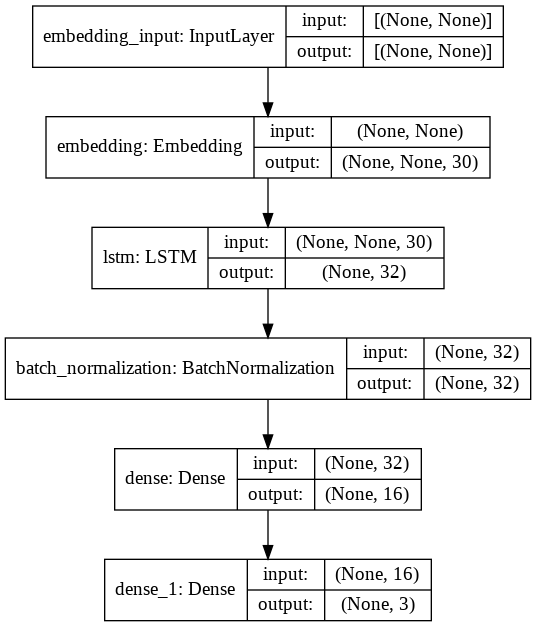

In [ ]:
from keras.utils import plot_model
plot_model(LSTM_model_inside_Embedding, "simple_lstm.png", show_shapes=True)

> CNN 모델 : 소원이꺼 보고 텐서 플로로 바꿨는데 잘 모르겠습니다.

In [ ]:
CNN_input = tf.keras.Input(shape = (20,))
Embedded = Embedding(vocab_size, 100)(CNN_input)
Permuted = Permute(dims = (2,1))(Embedded)
CONV1 = Conv1D(filters = 70, kernel_size= 3, padding = 'same')(Permuted)
CONV1 = ReLU()(CONV1)
Pooled1 = MaxPool1D(CONV1.shape[1])(CONV1)
Flattened1 = Flatten()(Pooled1)


CONV2 = Conv1D(filters = 70, kernel_size= 4, padding = 'same')(Permuted)
CONV2 = ReLU()(CONV2)
Pooled2 = MaxPool1D(CONV2.shape[1])(CONV2)
Flattened2 = Flatten()(Pooled2)

CONV3 = Conv1D(filters = 70, kernel_size= 5, padding = 'same')(Permuted)
CONV3 = ReLU()(CONV3)
Pooled3 = MaxPool1D(CONV3.shape[1])(CONV3)
Flattened3 = Flatten()(Pooled3)

Merged = Concatenate()([Flattened1, Flattened2, Flattened3])
CNN_output = Dense(3)(Merged)

In [ ]:
CNN_model_inside_Embedding = tf.keras.Model(CNN_input, CNN_output)
CNN_model_inside_Embedding.summary()

In [ ]:
CNN_model_inside_Embedding.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
CNN_model_inside_Embedding.fit(X_train_Youtube, Y_train_Youtube, epochs=10, verbose=2, validation_data= (X_Val_Youtube, Y_Val_Youtube))

Epoch 1/10
275/275 - 8s - loss: 8.4747 - acc: 0.3088 - val_loss: 8.7185 - val_acc: 0.3268
Epoch 2/10
275/275 - 8s - loss: 8.6800 - acc: 0.3331 - val_loss: 8.7185 - val_acc: 0.3268
Epoch 3/10
275/275 - 8s - loss: 8.6818 - acc: 0.3330 - val_loss: 8.7185 - val_acc: 0.3268
Epoch 4/10
275/275 - 7s - loss: 8.6818 - acc: 0.3330 - val_loss: 8.7185 - val_acc: 0.3268
Epoch 5/10
275/275 - 7s - loss: 8.6818 - acc: 0.3330 - val_loss: 8.7185 - val_acc: 0.3268
Epoch 6/10
275/275 - 7s - loss: 8.6818 - acc: 0.3330 - val_loss: 8.7185 - val_acc: 0.3268
Epoch 7/10
275/275 - 7s - loss: 8.6818 - acc: 0.3330 - val_loss: 8.7185 - val_acc: 0.3268
Epoch 8/10
275/275 - 7s - loss: 8.6818 - acc: 0.3330 - val_loss: 8.7185 - val_acc: 0.3268
Epoch 9/10
275/275 - 7s - loss: 8.6818 - acc: 0.3330 - val_loss: 8.7185 - val_acc: 0.3268
Epoch 10/10
275/275 - 7s - loss: 8.6818 - acc: 0.3330 - val_loss: 8.7185 - val_acc: 0.3268


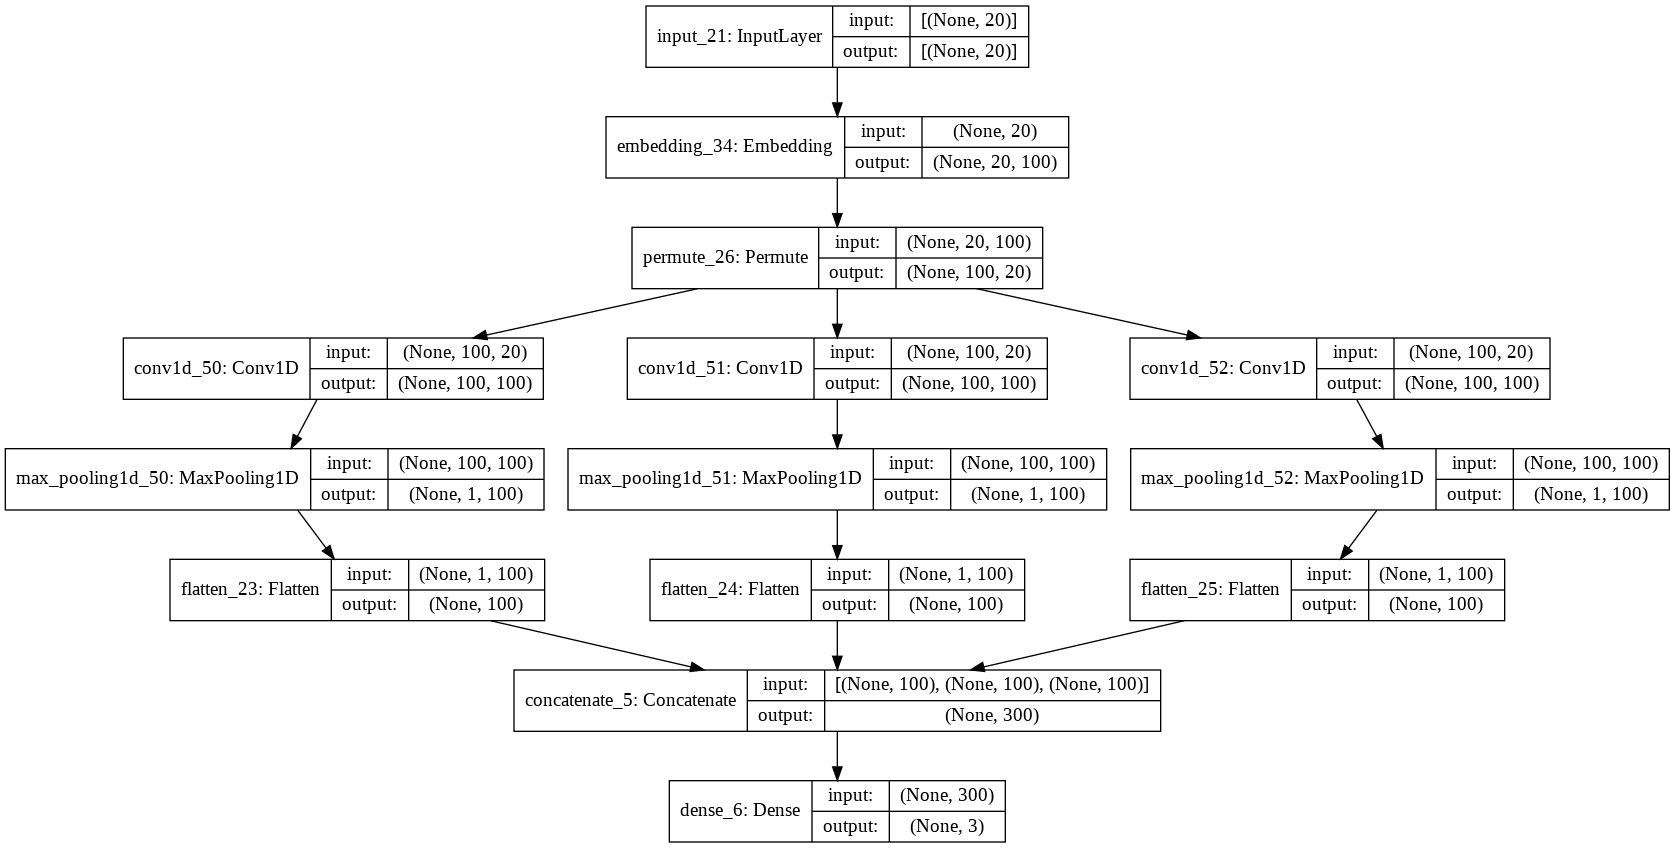

In [ ]:
tf.keras.utils.plot_model(CNN_model_inside_Embedding, "CNN.png", show_shapes=True)

### 2. Pre-trained 가져다 쓰기

> LSTM 기본 모델

In [ ]:
from tqdm import tqdm_notebook

def load_pretrained_vectors(word2idx, fname):
    """Load pretrained vectors and create embedding layers.
    
    Args:
        word2idx (Dict): Vocabulary built from the corpus
        fname (str): Path to pretrained vector file

    Returns:
        embeddings (np.array): Embedding matrix with shape (N, d) where N is
            the size of word2idx and d is embedding dimension
    """

    print("Loading pretrained vectors...")
    fin = open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())

    # Initilize random embeddings
    embeddings = np.random.uniform(-0.25, 0.25, (len(word2idx), d))
    embeddings[word2idx['<pad>']] = np.zeros((d,))

    # Load pretrained vectors
    count = 0
    for line in tqdm_notebook(fin):
        tokens = line.rstrip().split(' ')
        word = tokens[0]
        if word in word2idx:
            count += 1
            embeddings[word2idx[word]] = np.array(tokens[1:], dtype=np.float32)

    print(f"There are {count} / {len(word2idx)} pretrained vectors found.")

    return embeddings

In [ ]:
word2

0                                           흠.. 일단 전 안맞을래요
1        이강인은 밴투호에서 포지션 벤치,\nK리거는 월드컵같이 큰 무대에서 경쟁력없어,\n...
2               근데 선바님 스튜디오 이사하신 건가영..? 유튜브만 보는데 넘 궁금해여 ㅠㅠ
3                                                     해체 ㅋ
4                                         해리포터의 세드릭 배우분???
                               ...                        
10995    이건 팽수가 한마디해주면 종결되는거 아닌가. 사실상 페미가 팽수를 지켜주려는게 아니...
10996    이번화는 개인적인 경험과 너무 비슷해서 울컥하네요\n일하다가 보면  참세상에 여러사...
10997                                              하차는 에반데
10998    약을 줄여주셨던 의사쌤이 원망스러워질라 하네요....아이가 좋아져서 내렸던 합리적인...
10999         꼬마 트롯 가수들은  별로 보고 싶지 않는데. 아이들은 동요 대회장으로 보내야지
Name: comment, Length: 11000, dtype: object

In [ ]:
# Tok
# Load pretrained vectors
embeddings = load_pretrained_vectors(word2idx, '/content/drive/Shareddrives/[GH x Sandbox]/reference_data/cc.ko.300.vec')
#embeddings = torch.tensor(embeddings)

Loading pretrained vectors...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



There are 12155 / 18523 pretrained vectors found.


In [ ]:
embeddings.shape

(18523, 300)

In [ ]:
LSTM_model_pretrained_Embedding = Sequential()
trained_embedding = Embedding(vocab_size, 300, weights=[embeddings], input_length=20, trainable=False)
LSTM_model_pretrained_Embedding.add(trained_embedding)
#LSTM_model_pretrained_Embedding.add(Embedding(vocab_size, 30)) #여기서 30은 각 단어 마다 30차원으로 임베딩 하겠다는 것을 의미.
LSTM_model_pretrained_Embedding.add(LSTM(32))
LSTM_model_pretrained_Embedding.add(BatchNormalization())
LSTM_model_pretrained_Embedding.add(Dense(16, activation = 'tanh'))
LSTM_model_pretrained_Embedding.add(Dense(3, activation = 'softmax'))# 여기서 3은 최종 라벨 갯수
LSTM_model_pretrained_Embedding.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
LSTM_model_pretrained_Embedding.fit(X_train_Youtube, Y_train_Youtube, epochs=30, verbose=2, validation_data= (X_Val_Youtube, Y_Val_Youtube))
# 학습은 안됩니다. ㅋ

Epoch 1/30
275/275 - 4s - loss: 0.9187 - acc: 0.5811 - val_loss: 0.8937 - val_acc: 0.5755
Epoch 2/30
275/275 - 2s - loss: 0.7925 - acc: 0.6532 - val_loss: 0.8199 - val_acc: 0.6291
Epoch 3/30
275/275 - 2s - loss: 0.7462 - acc: 0.6732 - val_loss: 0.8076 - val_acc: 0.6505
Epoch 4/30
275/275 - 2s - loss: 0.7139 - acc: 0.6907 - val_loss: 0.8163 - val_acc: 0.6377
Epoch 5/30
275/275 - 2s - loss: 0.6881 - acc: 0.7049 - val_loss: 0.7969 - val_acc: 0.6545
Epoch 6/30
275/275 - 2s - loss: 0.6575 - acc: 0.7174 - val_loss: 0.8264 - val_acc: 0.6455
Epoch 7/30
275/275 - 2s - loss: 0.6378 - acc: 0.7293 - val_loss: 0.8250 - val_acc: 0.6527
Epoch 8/30
275/275 - 2s - loss: 0.6080 - acc: 0.7458 - val_loss: 0.8358 - val_acc: 0.6386
Epoch 9/30
275/275 - 2s - loss: 0.5879 - acc: 0.7601 - val_loss: 0.8290 - val_acc: 0.6450
Epoch 10/30
275/275 - 2s - loss: 0.5561 - acc: 0.7718 - val_loss: 0.8723 - val_acc: 0.6482
Epoch 11/30
275/275 - 2s - loss: 0.5365 - acc: 0.7856 - val_loss: 0.8814 - val_acc: 0.6355
Epoch 12

> CNN

In [ ]:
CNN_input = tf.keras.Input(shape = (20,))
trained_embedding = Embedding(vocab_size, 300, weights=[embeddings], input_length=20, trainable=False)
Embedded = trained_embedding(CNN_input)
Permuted = Permute(dims = (2,1))(Embedded)
CONV1 = Conv1D(filters = 100, kernel_size= 3, padding = 'same')(Permuted)
CONV1 = ReLU()(CONV1)
Pooled1 = MaxPool1D(CONV1.shape[1])(CONV1)
Flattened1 = Flatten()(Pooled1)


CONV2 = Conv1D(filters = 100, kernel_size= 4, padding = 'same')(Permuted)
CONV2 = ReLU()(CONV2)
Pooled2 = MaxPool1D(CONV2.shape[1])(CONV2)
Flattened2 = Flatten()(Pooled2)

CONV3 = Conv1D(filters = 100, kernel_size= 5, padding = 'same')(Permuted)
CONV3 = ReLU()(CONV3)
Pooled3 = MaxPool1D(CONV3.shape[1])(CONV3)
Flattened3 = Flatten()(Pooled3)

Merged = Concatenate()([Flattened1, Flattened2, Flattened3])
CNN_output = Dense(3)(Merged)

In [ ]:
CNN_model_inside_Embedding = tf.keras.Model(CNN_input, CNN_output)
CNN_model_inside_Embedding.summary()

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_32 (InputLayer)           [(None, 20)]         0                                            
__________________________________________________________________________________________________
embedding_50 (Embedding)        (None, 20, 300)      5556900     input_32[0][0]                   
__________________________________________________________________________________________________
permute_37 (Permute)            (None, 300, 20)      0           embedding_50[0][0]               
__________________________________________________________________________________________________
conv1d_83 (Conv1D)              (None, 300, 100)     6100        permute_37[0][0]                 
___________________________________________________________________________________________

In [ ]:
CNN_model_inside_Embedding.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
CNN_model_inside_Embedding.fit(X_train_Youtube, Y_train_Youtube, epochs=10, verbose=2, validation_data= (X_Val_Youtube, Y_Val_Youtube))

Epoch 1/10
275/275 - 10s - loss: 1.0279 - acc: 0.1377 - val_loss: 0.9518 - val_acc: 0.1323
Epoch 2/10
275/275 - 9s - loss: 0.9508 - acc: 0.1335 - val_loss: 0.9455 - val_acc: 0.1327
Epoch 3/10
275/275 - 9s - loss: 0.9469 - acc: 0.1326 - val_loss: 0.9510 - val_acc: 0.1323
Epoch 4/10
275/275 - 9s - loss: 3.7479 - acc: 0.3059 - val_loss: 7.1512 - val_acc: 0.5391
Epoch 5/10
275/275 - 9s - loss: 7.6309 - acc: 0.5293 - val_loss: 7.7660 - val_acc: 0.5395
Epoch 6/10
275/275 - 9s - loss: 8.0152 - acc: 0.5286 - val_loss: 7.8539 - val_acc: 0.5395
Epoch 7/10
275/275 - 9s - loss: 8.1140 - acc: 0.5283 - val_loss: 7.9052 - val_acc: 0.5391
Epoch 8/10
275/275 - 10s - loss: 8.2331 - acc: 0.5283 - val_loss: 7.9858 - val_acc: 0.5391
Epoch 9/10
275/275 - 9s - loss: 8.2330 - acc: 0.5283 - val_loss: 7.9858 - val_acc: 0.5391
Epoch 10/10
275/275 - 9s - loss: 8.2330 - acc: 0.5283 - val_loss: 7.9858 - val_acc: 0.5391


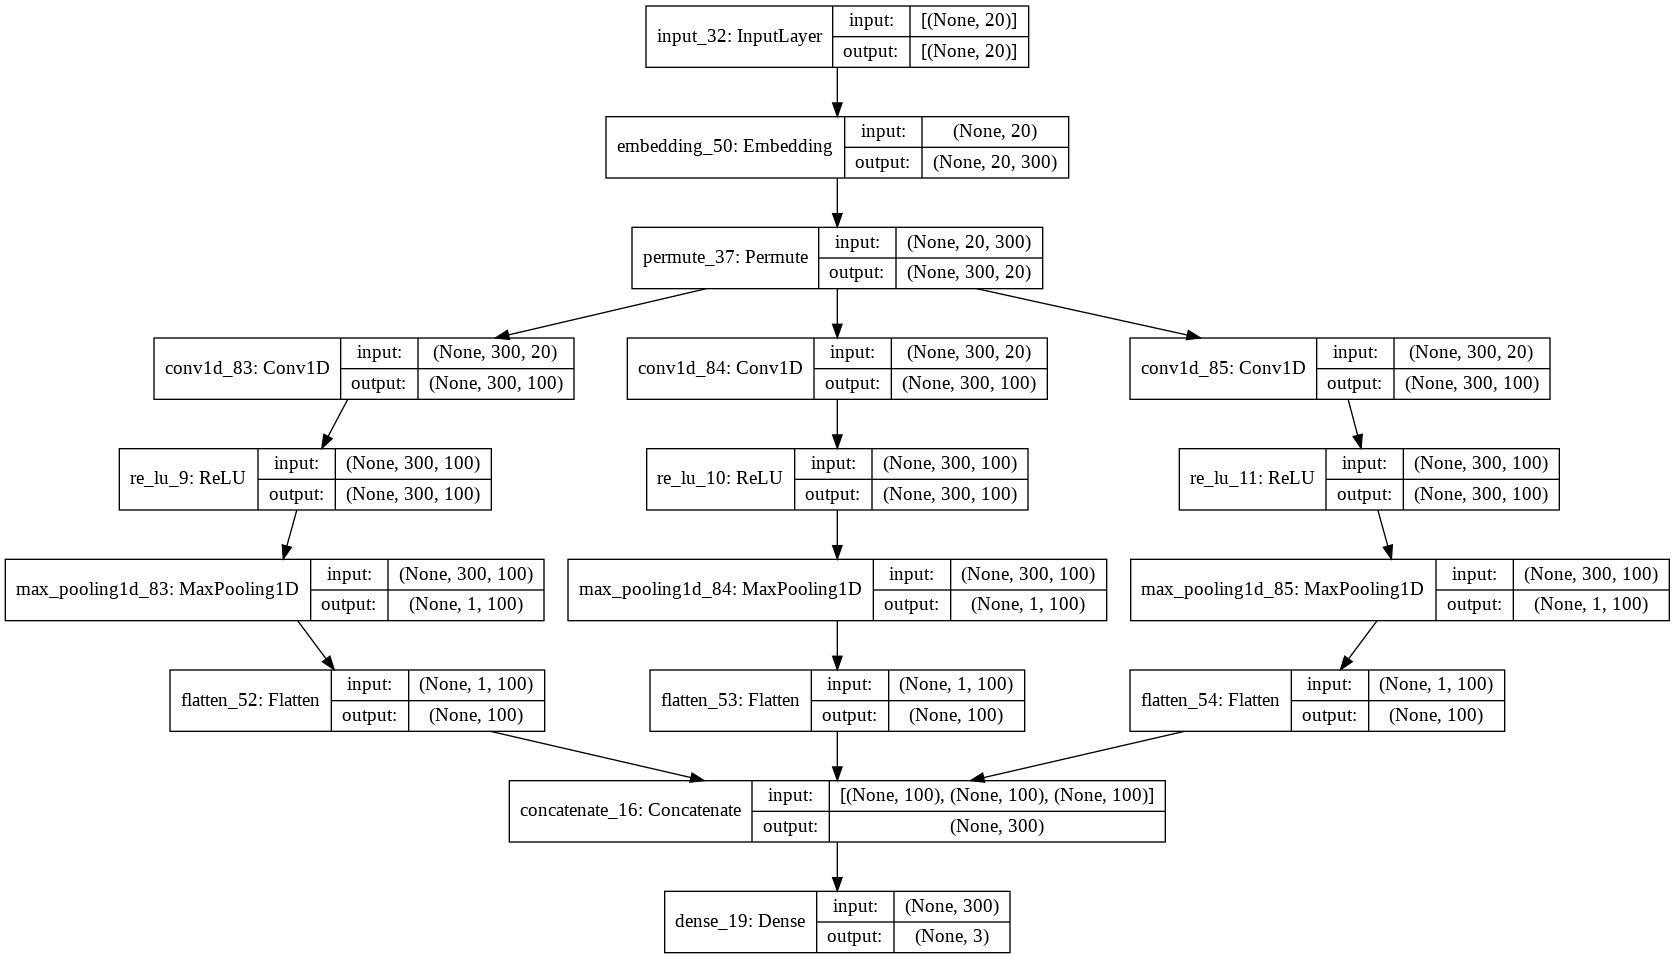

In [ ]:
tf.keras.utils.plot_model(CNN_model_inside_Embedding, "CNN.png", show_shapes=True)